In [1]:
import numpy as np
import matplotlib.pyplot as plt

Akcije koje igraci imaju su DEFECT i COOPERATE

In [2]:
COOPERATE = 0
DEFECT = 1

Ukoliko oba igraca izaberu COOPERATE, odnosno zele da podele poene dobice po 3p. Ukoliko oba zele da uzmu poene sebi dobice po poen, dok ukoliko jedan odluci da podeli, a drugi da uzme, igrac koji deli ne dobija nista, dok ovaj sto je uzeo dobija 5p.

In [4]:

payoff_matrix = {
    (COOPERATE, COOPERATE): (3, 3),  
    (COOPERATE, DEFECT): (0, 5),     
    (DEFECT, COOPERATE): (5, 0),    
    (DEFECT, DEFECT): (1, 1)         
}

Simulira se x partija. Na duze staze 150+ partija, igrac 2 koji uvek igra na saradnju dok igrac 1 ne odigra sebicno, nakon cega bi igrac 2 igrao suprotno od poslednje odluke igraca 1, dobija vecu dobit na kraju u teoriji.
Igrac 2 u teoriji uvek dobija na duze staze ukoliko da sansu igracu 1 igrajuci na saradju pri pocetku simulacije, dok onda sistemski igra suportno od igraca 1 svaki potez ili ucestalo.

In [76]:
rounds = 150
choices_p1 = []
choices_p2 = []
payoffs_p1 = []
payoffs_p2 = []

In [77]:
#np.random.seed(42)  # zadrzava iste random brojeve i sledeci put kad se pokrene - --debug
player_2_defects = False #ovde pamti da je igrac 1 u porsloj rundi izdao
previous_choice_p1 = COOPERATE #igrac 2 uvek igra prvo cooperate

for _ in range(rounds):
    choice_p1 = np.random.choice([COOPERATE, DEFECT]) #glupi igrac 1 bira random
    choices_p1.append(choice_p1)
    
    if  not player_2_defects:  
        choice_p2 = COOPERATE  #igra saradnju ako je igrac 1 proslu igrao na saradju
        if choice_p1 == DEFECT: 
            player_2_defects = True  #igra defect ako je igrac 1 u prosloj igrao defect
        #else:
            #player_2_defects = False
    else:
        #choice_p2 = DEFECT if previous_choice_p1 == DEFECT else COOPERATE #igraj cooperate ako je igrac1 proslu defect
         choice_p2 = previous_choice_p1 
         
    choices_p2.append(choice_p2)
    
#


    previous_choice_p1 = choice_p1
    

    payoff_p1, payoff_p2 = payoff_matrix[(choice_p1, choice_p2)]
    payoffs_p1.append(payoff_p1)
    payoffs_p2.append(payoff_p2)


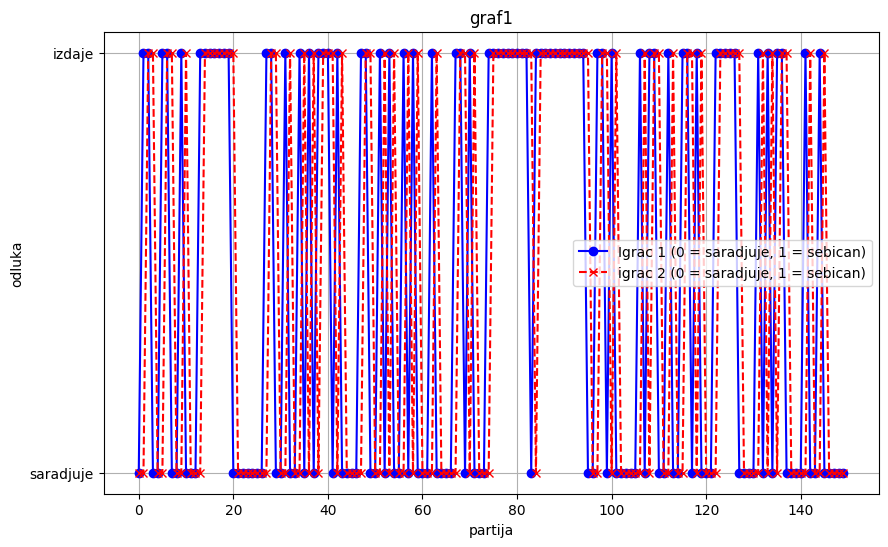

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [78]:

plt.figure(figsize=(10, 6))


plt.plot(choices_p1, label="Igrac 1 (0 = saradjuje, 1 = sebican)", color='blue', marker='o', linestyle='-')
plt.plot(choices_p2, label="igrac 2 (0 = saradjuje, 1 = sebican)", color='red', marker='x', linestyle='--')
plt.title("graf1")
plt.xlabel("partija")
plt.ylabel("odluka")
plt.yticks([COOPERATE, DEFECT], ["saradjuje", "izdaje"])
plt.legend()

plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))

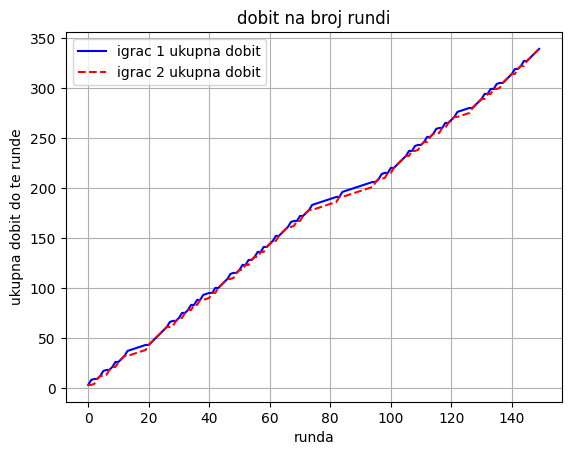

igrac 1 dobiti:  [  3   8   9   9  12  17  18  18  21  26  26  29  32  37  38  39  40  41
  42  43  43  46  49  52  55  58  61  66  67  67  70  75  75  78  83  83
  88  88  93  94  95  95 100 100 103 106 109 114 115 115 118 123 123 128
 128 131 136 136 141 141 144 147 152 152 155 158 161 166 167 167 172 172
 175 178 183 184 185 186 187 188 189 190 191 191 196 197 198 199 200 201
 202 203 204 205 206 206 209 214 215 215 220 220 223 226 229 232 237 237
 242 243 243 246 251 251 254 259 260 260 265 265 268 271 276 277 278 279
 280 280 283 286 289 294 294 299 299 304 305 305 308 311 314 319 319 322
 327 327 330 333 336 339] 

  igrac 2 dobiti:  [  3   3   4   9  12  12  13  18  21  21  26  29  32  32  33  34  35  36
  37  38  43  46  49  52  55  58  61  61  62  67  70  70  75  78  78  83
  83  88  88  89  90  95  95 100 103 106 109 109 110 115 118 118 123 123
 128 131 131 136 136 141 144 147 147 152 155 158 161 161 162 167 167 172
 175 178 178 179 180 181 182 183 184 185 186 191 191 192 193

In [84]:

accumulated_payoff_p1 = np.cumsum(payoffs_p1)
accumulated_payoff_p2 = np.cumsum(payoffs_p2)

ukupnadobit_p1 = sum(accumulated_payoff_p1)
ukupnadobit_p2 = sum(accumulated_payoff_p2)

plt.plot(accumulated_payoff_p1, label="igrac 1 ukupna dobit", color='blue', linestyle='-')
plt.plot(accumulated_payoff_p2, label="igrac 2 ukupna dobit", color='red', linestyle='--')

plt.title("dobit na broj rundi")
plt.xlabel("runda")
plt.ylabel("ukupna dobit do te runde")
plt.legend()

plt.grid(True)
plt.show()

print("igrac 1 dobiti: ", accumulated_payoff_p1, "\n\n", " igrac 2 dobiti: ", accumulated_payoff_p2)
print("igrac 1 ukupna dobit: ", ukupnadobit_p1, "\n\n", " igrac 2 ukupna dobit: ", ukupnadobit_p2)